In [ ]:
# Dot Plot
# a graphical method that allows the comparison of two biological sequences and identify regions of close similarity between them
# simplest method - put a dot wherever sequences are identical
# dotplots compare two sequences by organising one sequence on the x-axis, and another on the y-axis, of a plot
# when the residues of both sequences match at the same location on the plot, a dot is drawn at the corresponding position

In [1]:
# usefulness
# dot plots used to visually inspect sequences for
# - direct or inverted repeats
# - regions with low sequence complexity
# - similar regions
# - repeated sequences
# - sequence rearrangements
# - RNA structures
# - gene order


In [4]:
def delta(x,y):
    return 0 if x ==y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t,seq1,seq2,nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1,seq2,k = 1, t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M,t,seq1,seq2)
    #experiment with character choice

In [8]:
from Bio.Seq import Seq
seq1 = Seq('ACTTAG')
seq2 = Seq('AC')

In [9]:
dotplot(seq1,seq2)

 |AC
----
A|■ 
C| ■
T|  
T|  
A|■ 
G|  


In [11]:
# Identical show diagonal line
dotplot(seq1,seq1)


 |ACTTAG
--------
A|■   ■ 
C| ■    
T|  ■■  
T|  ■■  
A|■   ■ 
G|     ■


In [12]:
dotplot('TREE','TREE')

 |TREE
------
T|■   
R| ■  
E|  ■■
E|  ■■


In [19]:
import matplotlib.pyplot as plt
import numpy as np

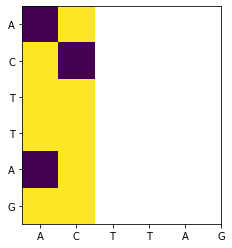

In [33]:
# Add some fancyness to it

plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [39]:
# Convert to Fxn
def dotplotx(seq1, seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))

    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

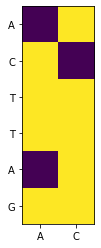

In [40]:
dotplotx(seq1,seq2)

In [41]:
dna1 = Seq('ATGATCTCGTAA')
dna2 = Seq('ATTATGTCGTAA')

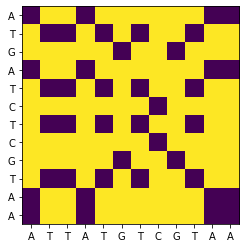

In [42]:
dotplotx(dna1,dna2)

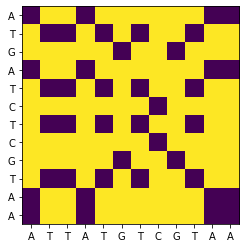

In [43]:
dotplot(dna1,dna2)

In [44]:
dna1 = Seq('ATGATCTCGTAA')
dna2 = Seq('ATTATGTCGTAAATTATGTCGTAAATTATGTCGTAAATTATGTCGTAA')

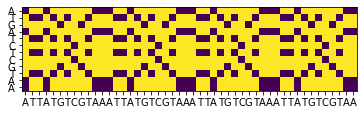

In [45]:
dotplot(dna1,dna2)